In [1]:
pip install -U fortran-magic

In [2]:
%reload_ext fortranmagic

/usr/local/lib/python3.6/dist-packages/fortranmagic.py:147: UserWarning: get_ipython_cache_dir has moved to the IPython.paths module since IPython 4.0.
  self._lib_dir = os.path.join(get_ipython_cache_dir(), 'fortran')


Listas


In [3]:
lista = ['proof', 0, True, 'of', 'list', 45]
lista

['proof', 0, True, 'of', 'list', 45]

In [4]:
lista_object = ['proof', 0, True, 'of', 'list', 45, object()]
lista_object

['proof', 0, True, 'of', 'list', 45, <object at 0x7f21ea85a8c0>]

In [5]:
firstLista = lista[0]
secondLista = lista[1]
print("First element of lista: ", firstLista)
print("Second element of lista: ", secondLista)

First element of lista:  proof
Second element of lista:  0


In [6]:
lastLista = lista[-1]
antepenultimateLista = lista[-3]
print('last of lista:', lastLista)
print('third of lista:', antepenultimateLista)

last of lista: 45
third of lista: of


In [7]:
subLista= lista[2:5]
subLista

[True, 'of', 'list']

In [8]:
first_two = lista[:2]
first_two

['proof', 0]

In [9]:
after_two = lista[2:]
after_two

[True, 'of', 'list', 45]

In [10]:
lista = ['0','1','2','3','4','5','6', '7', '8', '9', '10']
lista[1:6:2]

['1', '3', '5']

In [11]:
lista = [True, False, 'lista', 23, 8.9, True]
print("lista before", lista)
lista.append(45)
print("lista after", lista)

lista before [True, False, 'lista', 23, 8.9, True]
lista after [True, False, 'lista', 23, 8.9, True, 45]


In [12]:
lista = [23.5, 56.7, 45, 9, 1, 3, 2.9]
[n+4 for n in lista]

[27.5, 60.7, 49, 13, 5, 7, 6.9]

Diccionarios


In [13]:
diccionario = {'Juan': 'Gonzales', 'Ricardo': 'fernandez', 'luis': 'rojas', 'pablo': 'gutierrez'}
diccionario

{'Juan': 'Gonzales',
 'Ricardo': 'fernandez',
 'luis': 'rojas',
 'pablo': 'gutierrez'}

In [14]:
diccionario['walter'] = 'morales'
diccionario

{'Juan': 'Gonzales',
 'Ricardo': 'fernandez',
 'luis': 'rojas',
 'pablo': 'gutierrez',
 'walter': 'morales'}

In [15]:
del diccionario['Juan']
diccionario

{'Ricardo': 'fernandez',
 'luis': 'rojas',
 'pablo': 'gutierrez',
 'walter': 'morales'}

In [16]:
diccionario['Ricardo':'Pablo']

TypeError: ignored

Matrices: Lista de listas

In [17]:
a = [
     [2.1 , 5 , 9],
     [3, 8, 12],
     [9.7, 65, 2]
]
b = [
   [1, 5, 78],
   [8, 34, 11],
   [3, 9, 34] 
]

In [18]:
def prod(A,B):
  rows = len(A)
  cols = len(B[0])
  result = [[0 for col in range(cols)] for row in range(rows)]
    
  for i in range(rows):
      for j in range(cols):
          for k in range(len(B)):
              result[i][j] += A[i][k] * B[k][j]
  return result

In [19]:
%%time

prod(a,b)

CPU times: user 26 µs, sys: 5 µs, total: 31 µs
Wall time: 34.3 µs


[[69.1, 261.5, 524.8], [103, 395, 730], [535.7, 2276.5, 1539.6]]

In [20]:
import random
def matriz_random(f, c):
    matrix = []
    for fila in range(f):
        matrix.append([random.random() for _ in range(c)])
    return matrix

matrixP = matriz_random(2, 5)
matrixP

[[0.15173238186722238,
  0.5538606914132193,
  0.5063497273049994,
  0.5842218588925092,
  0.6295014091243681],
 [0.6098025232204444,
  0.5602202776555865,
  0.32646238524940063,
  0.008022938471458185,
  0.5530601384631059]]

In [21]:
%%time
randomA = matriz_random(300, 700)
randomB = matriz_random(700, 120)
x = prod(randomA, randomB)

CPU times: user 5.03 s, sys: 4.66 ms, total: 5.03 s
Wall time: 5.07 s


In [22]:
def dot_product(a, b):
    return sum(a * b for a, b in zip(a, b))

In [23]:
%%fortran
subroutine dot_product_withFortran(x, y, resultFortran)
    double precision, intent(in) :: x(:)
    double precision, intent(in) :: y(:)
    double precision, intent(out) :: resultFortran
    
    resultFortran = sum(x * y)
end


In [24]:
import numpy as np
dataP = [float(j) for j in range(600000)]
dataP = np.array(dataP)

In [25]:
%%time
dot_product(dataP, dataP)

CPU times: user 265 ms, sys: 1.97 ms, total: 267 ms
Wall time: 271 ms


7.19998199998264e+16

In [26]:
%%time
dot_product_withfortran(dataP, dataP)

CPU times: user 1.57 ms, sys: 38 µs, total: 1.61 ms
Wall time: 6.02 ms


7.19998199998264e+16

### ¿Por qué python es mas lento?

In [27]:
def mulWithZip(a,b):
  return[a*b for a,b in zip(a,b)]
mulWithZip([12, 'example', 'a', 7], [1, 4, 2, (3 + 2j), 1.3])

[12, 'exampleexampleexampleexample', 'aa', (21+14j)]

Usando compilador bytecode

In [28]:
import py_compile
import dis
code = 'a*3 + 2*(b-c)'
compileCode = compile(code, '', 'eval')
dis.dis(compileCode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_CONST               0 (3)
              4 BINARY_MULTIPLY
              6 LOAD_CONST               1 (2)
              8 LOAD_NAME                1 (b)
             10 LOAD_NAME                2 (c)
             12 BINARY_SUBTRACT
             14 BINARY_MULTIPLY
             16 BINARY_ADD
             18 RETURN_VALUE


Usos de Python con numpy

In [29]:
import numpy as np
dataP = np.array([2.3, 5, 9, 12.5])
dataP

array([ 2.3,  5. ,  9. , 12.5])

In [30]:
dataP + dataP

array([ 4.6, 10. , 18. , 25. ])

In [31]:
%%time
(dataP * dataP).sum()

CPU times: user 93 µs, sys: 5 µs, total: 98 µs
Wall time: 103 µs


267.53999999999996

Con la función dot

In [32]:
%%time
dataP.dot(dataP)

CPU times: user 36 µs, sys: 2 µs, total: 38 µs
Wall time: 42.2 µs


267.53999999999996

In [33]:
%%time
dot_product_withfortran(dataP, dataP)

CPU times: user 10 µs, sys: 0 ns, total: 10 µs
Wall time: 13.8 µs


267.53999999999996

In [34]:
dataP[0] = 'text'

ValueError: ignored

Aumentando el arreglo, no se puede

In [35]:
dataP.append(8)

AttributeError: ignored

In [36]:
arrayTwo = dataP.reshape(2,2)
arrayTwo

array([[ 2.3,  5. ],
       [ 9. , 12.5]])

Mirando adentro de un arreglo

In [37]:
arreglo = np.array([34, 5, 8, 12, 0, 5], dtype='int16').reshape(2,3)
print('arreglo\n', arreglo, sep='')
print('---------------')
print('data type: ', arreglo.dtype)
print('shape', arreglo.shape)
print('strides', arreglo.strides)
print('data in bytes', arreglo.data.tobytes())

arreglo
[[34  5  8]
 [12  0  5]]
---------------
data type:  int16
shape (2, 3)
strides (6, 2)
data in bytes b'"\x00\x05\x00\x08\x00\x0c\x00\x00\x00\x05\x00'


Funciones UFunc para operar con otros elementos y arrreglos

In [38]:
dataP = np.arange(20).reshape(4,5)
dataP

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [39]:
dataP * dataP

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196],
       [225, 256, 289, 324, 361]])

In [40]:
np.sqrt(dataP)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739],
       [3.87298335, 4.        , 4.12310563, 4.24264069, 4.35889894]])

In [41]:
dataP%7==0

array([[ True, False, False, False, False],
       [False, False,  True, False, False],
       [False, False, False, False,  True],
       [False, False, False, False, False]])

Combinando operadores lógicos

In [42]:
((dataP % 5) == 1) & ((dataP % 4) == 0)

array([[False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False,  True, False, False, False]])

In [43]:
dataP @ dataP.T

array([[  30,   80,  130,  180],
       [  80,  255,  430,  605],
       [ 130,  430,  730, 1030],
       [ 180,  605, 1030, 1455]])

Selecciones y repaso de funciones UFunc

In [44]:
seno = np.sin(np.linspace(0, 3.1415, 8))
coseno = np.cos(np.linspace(0, 3.1415, 8))
seno

array([0.00000000e+00, 4.33871814e-01, 7.81814977e-01, 9.74919075e-01,
       9.74939692e-01, 7.81872744e-01, 4.33955290e-01, 9.26535897e-05])

In [45]:
seno[7]

9.265358966049026e-05

In [46]:
seno[:6]

array([0.        , 0.43387181, 0.78181498, 0.97491908, 0.97493969,
       0.78187274])

In [47]:
seno[6:]

array([4.33955290e-01, 9.26535897e-05])

In [48]:
seno[::3]

array([0.        , 0.97491908, 0.43395529])

Filtrando con matrices booleanas

In [49]:
print('funcion seno \n', seno)
print('valores de seno condicionados \n', seno > 0.87)
print('valores de senoque cumplen la condicion \n', seno[seno > 0.87])

funcion seno 
 [0.00000000e+00 4.33871814e-01 7.81814977e-01 9.74919075e-01
 9.74939692e-01 7.81872744e-01 4.33955290e-01 9.26535897e-05]
valores de seno condicionados 
 [False False False  True  True False False False]
valores de senoque cumplen la condicion 
 [0.97491908 0.97493969]


Indexando con listas


In [50]:
print(seno)
seno[[2,4,6]]

[0.00000000e+00 4.33871814e-01 7.81814977e-01 9.74919075e-01
 9.74939692e-01 7.81872744e-01 4.33955290e-01 9.26535897e-05]


array([0.78181498, 0.97493969, 0.43395529])

Ordenando arreglos

In [51]:
unsorted_array = np.array([2, 2.01, -3, 5, -7, 13])
indices_ordered = np.argsort(unsorted_array)
indices_ordered
print(unsorted_array[indices_ordered])

[-7.   -3.    2.    2.01  5.   13.  ]


In [52]:
actions = np.array([12, 4, 3.01, 3.0001, 45, -7, -8]), 
actives = np.array(['A', 'B','C', 'D', 'E', 'F', 'G'])
#usando permutación
order_by_actives = np.argsort(actions)
actives[order_by_actives]

array([['G', 'F', 'D', 'C', 'B', 'A', 'E']], dtype='<U1')

Alineando datos

In [53]:
import pandas as pd
apr2019 = pd.to_datetime(['2019-04-03 00:00:00+00:00',
 '2019-04-04 00:00:00+00:00',
 '2019-04-05 00:00:00+00:00',
 '2019-04-06 00:00:00+00:00',
 '2019-04-09 00:00:00+00:00',
 '2019-04-10 00:00:00+00:00',
 '2019-04-11 00:00:00+00:00',
 '2019-04-12 00:00:00+00:00',
 '2019-04-13 00:00:00+00:00',
 '2019-04-17 00:00:00+00:00',
 '2019-04-18 00:00:00+00:00',
 '2019-04-19 00:00:00+00:00',
 '2019-04-20 00:00:00+00:00',
 '2019-04-23 00:00:00+00:00',
 '2019-04-24 00:00:00+00:00',
 '2019-04-25 00:00:00+00:00',
 '2019-04-26 00:00:00+00:00',
 '2019-04-27 00:00:00+00:00',
 '2019-04-30 00:00:00+00:00',
 '2019-05-01 00:00:00+00:00'])
event_dates = pd.to_datetime(['2019-04-16 00:00:00+00:00', 
                             '2019-04-17 00:00:00+00:00', 
                             '2019-04-18 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([25, 50, 75])
calendar = apr2019.values.astype('datetime64[D]')
print('dates', repr(event_dates))
print('values', repr(event_values))
print('calendar', repr(calendar))

dates array(['2019-04-16', '2019-04-17', '2019-04-18'], dtype='datetime64[D]')
values array([25, 50, 75])
calendar array(['2019-04-03', '2019-04-04', '2019-04-05', '2019-04-06',
       '2019-04-09', '2019-04-10', '2019-04-11', '2019-04-12',
       '2019-04-13', '2019-04-17', '2019-04-18', '2019-04-19',
       '2019-04-20', '2019-04-23', '2019-04-24', '2019-04-25',
       '2019-04-26', '2019-04-27', '2019-04-30', '2019-05-01'],
      dtype='datetime64[D]')


In [54]:
print('rows: ', event_dates)
print('Indices: ', calendar.searchsorted(event_dates))
print('Llenando fechas: ', calendar[calendar.searchsorted(event_dates)])

rows:  ['2019-04-16' '2019-04-17' '2019-04-18']
Indices:  [ 9  9 10]
Llenando fechas:  ['2019-04-17' '2019-04-17' '2019-04-18']


Slices con arrays multidimensionales

In [55]:
dataP = np.arange(64).reshape(8,8) 
dataP

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31],
       [32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47],
       [48, 49, 50, 51, 52, 53, 54, 55],
       [56, 57, 58, 59, 60, 61, 62, 63]])

In [56]:
dataP[:4, :4]

array([[ 0,  1,  2,  3],
       [ 8,  9, 10, 11],
       [16, 17, 18, 19],
       [24, 25, 26, 27]])

In [57]:
dataP[:2, [-1, -5]]

array([[ 7,  3],
       [15, 11]])

In [58]:
dataP[(dataP[3,:]% 5) ==0]

array([[ 8,  9, 10, 11, 12, 13, 14, 15],
       [48, 49, 50, 51, 52, 53, 54, 55]])

###Reducciones

In [59]:
def varianza(x):
  return((x -x.mean())**2).sum() / len(x)

In [60]:
varianza(np.random.standard_exponential(12))

0.49047333677927646

In [61]:
dataP = np.arange(60)
dataP.mean()

29.5

In [62]:
dataP = np.arange(50).reshape(10,5)
dataP

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34],
       [35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44],
       [45, 46, 47, 48, 49]])

In [63]:
dataP.mean()

24.5

In [64]:
dataP.mean(axis=0)

array([22.5, 23.5, 24.5, 25.5, 26.5])

In [65]:
dataP.mean(axis=1)

array([ 2.,  7., 12., 17., 22., 27., 32., 37., 42., 47.])

###Doing broadcasting

In [66]:
fila = np.array([20, 40, 60, 80])
columna = np.array([[12], [24], [36]])
print('fila', fila, sep='')
print('columna', columna, sep='')

fila[20 40 60 80]
columna[[12]
 [24]
 [36]]


In [67]:
fila + columna

array([[ 32,  52,  72,  92],
       [ 44,  64,  84, 104],
       [ 56,  76,  96, 116]])

Using reductions

In [68]:
print('DataP \n', dataP, sep='')
print('Mean \n', dataP.mean(), sep='')
print('DataP - mean \n', dataP - dataP.mean(), sep='')

DataP 
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]
 [30 31 32 33 34]
 [35 36 37 38 39]
 [40 41 42 43 44]
 [45 46 47 48 49]]
Mean 
24.5
DataP - mean 
[[-24.5 -23.5 -22.5 -21.5 -20.5]
 [-19.5 -18.5 -17.5 -16.5 -15.5]
 [-14.5 -13.5 -12.5 -11.5 -10.5]
 [ -9.5  -8.5  -7.5  -6.5  -5.5]
 [ -4.5  -3.5  -2.5  -1.5  -0.5]
 [  0.5   1.5   2.5   3.5   4.5]
 [  5.5   6.5   7.5   8.5   9.5]
 [ 10.5  11.5  12.5  13.5  14.5]
 [ 15.5  16.5  17.5  18.5  19.5]
 [ 20.5  21.5  22.5  23.5  24.5]]


###Selection with Pandas

In [69]:
selection = pd.Series(index = ['0','1','2', '3', '4'], data = [20, 40 ,60 ,8, 100])
selection

0     20
1     40
2     60
3      8
4    100
dtype: int64

In [70]:
print('index: ', selection.index)
print('values: ', selection.values)

index:  Index(['0', '1', '2', '3', '4'], dtype='object')
values:  [ 20  40  60   8 100]


In [71]:
selection.iloc[4]

100

In [72]:
selection.loc['2']

60

In [73]:
selection.iloc[:3]

0    20
1    40
2    60
dtype: int64

In [74]:
selection.loc[:'5']

0     20
1     40
2     60
3      8
4    100
dtype: int64

In [75]:
selection.iloc[[3, -2]]

3    8
3    8
dtype: int64

In [76]:
selection.loc[selection <50]

0    20
1    40
3     8
dtype: int64

Align by index

In [77]:
sp = pd.Series({'0': 12,'1': 67, '2': 45, '3': -10, '4': 5})
sp

0    12
1    67
2    45
3   -10
4     5
dtype: int64

In [78]:
selection + sp

0     32
1    107
2    105
3     -2
4    105
dtype: int64

In [79]:
(selection + sp).fillna(1.0)

0     32
1    107
2    105
3     -2
4    105
dtype: int64

Real datasets

In [81]:
real = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col= 'Date')
real.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,27.613066,30.572857,30.642857,30.340000,30.490000,123432400.0
2010-01-05,27.660807,30.625713,30.798571,30.464285,30.657143,150476200.0
2010-01-06,27.220825,30.138571,30.747143,30.107143,30.625713,138040000.0
2010-01-07,27.170504,30.082857,30.285715,29.864286,30.250000,119282800.0
2010-01-08,27.351143,30.282858,30.285715,29.865715,30.042856,111902700.0


In [82]:
real.iloc[:4, :3]

,Adj Close,Close,High
Date,,,
2010-01-04,27.613066,30.572857,30.642857
2010-01-05,27.660807,30.625713,30.798571
2010-01-06,27.220825,30.138571,30.747143
2010-01-07,27.170504,30.082857,30.285715


In [83]:
real.loc[pd.Timestamp('2010-01-04'): pd.Timestamp('2010-01-06'), ['Close', 'High']]

,Close,High
Date,,
2010-01-04,30.572857,30.642857
2010-01-05,30.625713,30.798571
2010-01-06,30.138571,30.747143


###Rolling operations

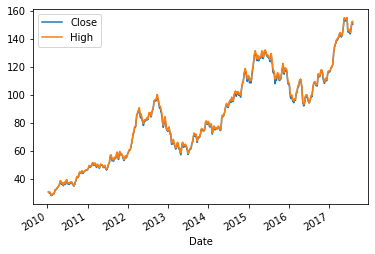

In [84]:
real.rolling(6)[['Close', 'High']].mean().plot()

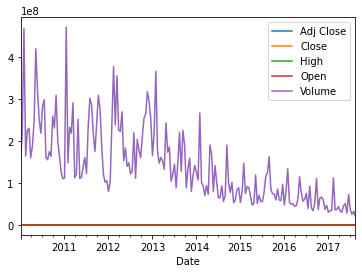

In [85]:
real.drop('Low', axis=1).resample('2W').max().plot()

30-day rolling exponentially-weighted stddev of returns.

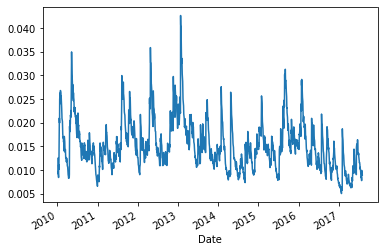

In [86]:
real['Close'].pct_change().ewm(span=20).std().plot();

###Real world data

In [87]:
from avocados import read_avocadata

realWorld = read_avocadata('2016', '2018')
realWorld.head()

,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2016-01-08 00:00:00+00:00,NATIONAL,HASS,False,9463,1.11,NaN,NaN
2,2016-01-08 00:00:00+00:00,NATIONAL,HASS,True,1575,1.69,NaN,NaN
4,2016-01-08 00:00:00+00:00,NATIONAL,GREENSKIN,False,228,0.96,NaN,NaN
6,2016-01-08 00:00:00+00:00,NATIONAL,GREENSKIN,True,189,1.41,NaN,NaN
7,2016-01-08 00:00:00+00:00,NORTHEAST,HASS,False,1541,1.23,0.78,2.0


In [88]:
realWorld.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

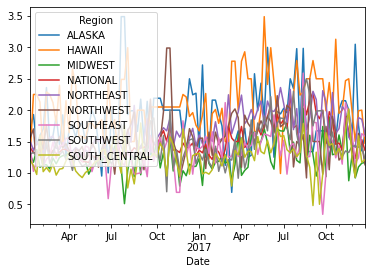

In [89]:
greenskin = realWorld[realWorld.Variety == "HASS"]
greenskin.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot()

In [90]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)
    
    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic 
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

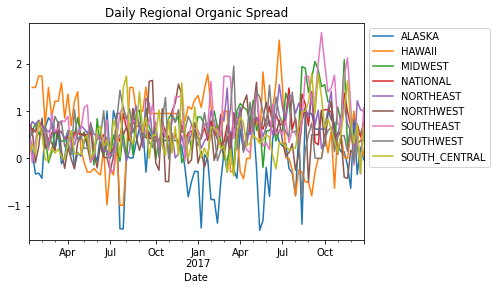

In [92]:
import matplotlib.pyplot as plt
organic_spread_by_region(greenskin).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [93]:
correlation = organic_spread_by_region(greenskin).corr()
correlation

Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,1.000000,-0.078049,0.144534,-0.125913,-0.025232,0.078243,0.143007,-0.200219,0.098232
HAWAII,-0.078049,1.000000,-0.206084,-0.077936,0.012045,0.063989,-0.183330,0.139988,-0.300074
MIDWEST,0.144534,-0.206084,1.000000,0.448229,0.266188,0.041338,0.394591,-0.257541,0.412487
NATIONAL,-0.125913,-0.077936,0.448229,1.000000,0.535419,0.113598,0.365196,0.194465,0.317013
NORTHEAST,-0.025232,0.012045,0.266188,0.535419,1.000000,0.128772,0.149644,0.133220,0.012656
NORTHWEST,0.078243,0.063989,0.041338,0.113598,0.128772,1.000000,0.171024,0.156221,0.035981
SOUTHEAST,0.143007,-0.183330,0.394591,0.365196,0.149644,0.171024,1.000000,-0.100038,0.414407
SOUTHWEST,-0.200219,0.139988,-0.257541,0.194465,0.133220,0.156221,-0.100038,1.000000,-0.288033
SOUTH_CENTRAL,0.098232,-0.300074,0.412487,0.317013,0.012656,0.035981,0.414407,-0.288033,1.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


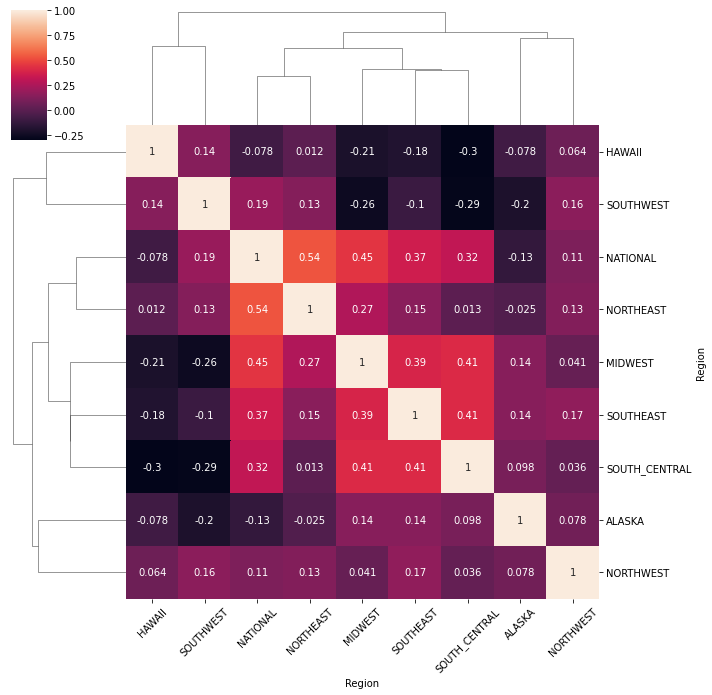

In [94]:
import seaborn as sns
gridPanel = sns.clustermap(correlation, annot=True)
fig = gridPanel.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);